# Pushing the phase-plane symmetries of the Lotka-Volterra model forward
*Written by:* Johannes Borgqvist,<br>
*Date:* 2022-08-18.<br>
In this script, we consider the phase plane ODE

\begin{equation}
\dfrac{\mathrm{d}v}{\mathrm{d}u}=\dfrac{\alpha v(u-1)}{u(1-v)}.
  \label{eq:LV_phase_plane}
\end{equation}
which has the following two non-trivial symmetries:
\begin{align}
  X_u&=\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u}\\
  X_v&=\dfrac{v}{1-v}\partial_v.\label{eq:LV_v}
\end{align}
Now, the full Lotka-Volterra model is given by 
\begin{equation}
  \begin{split}
    \dfrac{\mathrm{d}u}{\mathrm{d}\tau}&=u(1-v),\\
    \dfrac{\mathrm{d}v}{\mathrm{d}\tau}&=\alpha v(u-1),\\    
    \end{split}
  \label{eq:LV}
\end{equation}
and what we show in the paper is that the two non-trivial symmetries that we listed previously can be extended to two full symmetries acting on time as well as the states, i.e. mapping $(\tau,u(\tau),v(\tau))$ to another solution curve. These two unknown symmetries are generated by 
\begin{align}
  X_{\tau,u}&=\xi_{u}(\tau,u,v)\partial_\tau+\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u_full}\\
  X_{\tau,v}&=\xi_{v}(\tau,u,v)\partial_\tau+\dfrac{v}{1-v}\partial_v.\label{eq:LV_v_full}
\end{align}
and the two time infinitesimals $\xi_u$ and $\xi_v$ satisfy the following two PDEs
\begin{align}
  X_{\tau,u}:\quad u(1-v)\dfrac{\partial\xi_u}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_u}{\partial u}&=-\dfrac{u}{(u-1)^2},\label{eq:xi_u}\\
  X_{\tau,v}:\quad u(1-v)\dfrac{\partial\xi_v}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_v}{\partial u}&=+\dfrac{\alpha v}{(1-v)^2}\quad.\label{eq:xi_v}
\end{align}
In this notebook, we will find these two symmetries by solving the two PDEs above and then we will plot their action on solution curves to the full Lotka-Volterra model. 

# Load packages

In [1]:
from sympy import * # For symbolic computations

# The $X_{\tau,u}$ symmetry


In [ ]:
# Allocate all our symbols
# Independent and dependent variables (i.e. states and variable)
u,v = symbols('u v')
# The rate parameter alpha
alpha = symbols('alpha')
# Allocate our unknown infinitesimal
xi = Function('xi')
xi_u = xi(u,v)
# Define our derivatives
xi_u_u = xi_u.diff(u)
xi_u_v = xi_u.diff(v)
#xi_u = symbols('xi_u',cls=Function)
# Define our PDE for this time tangent
#xi_u_eq = Eq(u*(1-v)*xi_u_u+alpha*v*(u-1)*xi_u_v+((u)/((u-1)**2)),0)
xi_u_eq = Eq(u*(1-v)*xi_u_u+1*v*(u-1)*xi_u_v+u/(u-1)**2,0)
#xi_u_eq = u*(1-v)*(u-1)**2*xi_u_u+1*v*(u-1)*(u-1)**2*xi_u_v+u
# Now, solve our PDE for the time tangent
xi_u_sol = pdsolve(xi_u_eq)
# Also, check that we actually solve the equation
#assert checkpdesol(xi_u_eq, xi_u_sol)[0]
#print(checkpdesol(xi_u_eq, xi_u_sol))
# Print our time tangent
print(latex(xi_u_sol,mode='equation').replace("\\begin{equation}","\\begin{equation}\n").replace("\\end{equation}",".\n\\end{equation}"))
print(xi_u_sol)
assert checkpdesol(xi_u_eq, xi_u_sol)
print(checkpdesol(xi_u_eq, xi_u_sol))

So it turns out that we have to solve this equation for discrete values of $\alpha$. Below, comes a selection of these solutions. 

### $\alpha=1$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u v e^{- u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}


### $\alpha=2$

\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{2} v e^{- 2 u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}

### $\alpha=3$


\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{3} v e^{- 3 u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}

### $\alpha=4$

\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{4} v e^{- 4 u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}

### Conclusion
Now, it seems like a general solution might be given by
\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(-u^{\alpha} v e^{- \alpha u - v} \right)} + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1}.
\end{equation}
for an arbitrary function $F\in\mathcal{C}^{\infty}(\mathbb{R})$ and where $W\in\mathcal{C}^{\infty}(\mathbb{C})$ is the [*Lambert inverse function*](https://docs.sympy.org/latest/modules/functions/elementary.html) where $W(z)$ is defined as the inverse of $w\exp(w)$. A particularly interesting choice of $F$ is given by $F(x)=x$, and the corresponding candidate infinitesimal is given by:
    
\begin{equation}
\begin{split}
\xi_u{\left(u,v \right)} &= -u^{\alpha} v e^{- \alpha u - v}  + \frac{1}{u \left(W\left(- v e^{- v}\right) + 1\right) - W\left(- v e^{- v}\right) - 1},\\
\end{split}
\end{equation}    
One thing that is a bit worrying is that SymPy's own checkpdesol says that the solution SymPy fins does not actually solve the PDE at hand. Anyhow, we'll work with it and see what comes of it.

## Abandoning sympy and trying Wolphram Alpha instead
Something must be wrong with the above solution, as the symmetry does not map solutions to other solutions when we plot it in numpy. So, I typed in the PDE for $\xi_u$ in Wolphram Alpha and then another, more complicated, solution was returned. The solution that Wolphram Alpha returned was the following

\begin{equation}
\begin{split}
\xi_u{(u,v)}&=C_1\left(v+\alpha u-\ln(u^{\alpha}v)\right)\\
&+\int_{1}^{u}\dfrac{s}{(-s+2s^2-s^3)\left(1+W(I)\right)}\mathrm{d}s,\\
\mathrm{where}&\\
I&=-\exp\left(-v-\alpha u+\alpha s\right)u^{\alpha}vs^{-\alpha}.
\end{split}
\end{equation}
So let's see if we can implement the above infinitesimal instead!


# The $X_{\tau,v}$ symmetry

In [ ]:
# Allocate our unknown infinitesimal
xi = Function('xi')
xi_v = xi(u,v)
# Define our derivatives
xi_v_u = xi_v.diff(u)
xi_v_v = xi_v.diff(v)
#xi_u = symbols('xi_u',cls=Function)
# Define our PDE for this time tangent
#xi_u_eq = Eq(u*(1-v)*xi_u_u+alpha*v*(u-1)*xi_u_v+((alpha v)/((1-v)**2)),0)
xi_v_eq = Eq(u*(1-v)*(1-v)**2*xi_v_u+4*v*(u-1)*(1-v)**2*xi_v_v-4*v,0)
# Now, solve our PDE for the time tangent
xi_v_sol = pdsolve(xi_v_eq)
# Print our time tangent
print(latex(xi_v_sol,mode='equation').replace("\\begin{equation}","\\begin{equation}\n").replace("\\end{equation}",".\n\\end{equation}").replace("\\log","\\ln"))

So it turns out that we have to solve this equation for discrete values of $\alpha$. Below, comes a selection of these solutions. 

### $\alpha=1$


\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u v e^{- u - v} \right)} - \frac{\ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}





### $\alpha=2$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{2} v e^{- 2 u - v} \right)} - \frac{2 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}


### $\alpha=3$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{3} v e^{- 3 u - v} \right)} - \frac{3 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}



### $\alpha=4$

\begin{equation}
\xi{\left(u,v \right)} = F{\left(- u^{4} v e^{- 4 u - v} \right)} - \frac{4 \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}.
\end{equation}


### Conclusion
Now, it seems like a general solution might be given by
\begin{equation}
\xi_u{\left(u,v \right)} = F{\left(- u^{\alpha} v e^{- \alpha u - v} \right)} + \frac{\alpha \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1}
.
\end{equation}
    for an arbitrary function $F\in\mathcal{C}^{\infty}(\mathbb{R})$ and where $W\in\mathcal{C}^{\infty}(\mathbb{C})$ is the [*Lambert inverse function*](https://docs.sympy.org/latest/modules/functions/elementary.html) where $W(z)$ is defined as the inverse of $w\exp(w)$. A particularly interesting choice of $F$ is given by $F(x)=x$, and the corresponding candidate infinitesimal is given by
\begin{equation}
\begin{split}
\xi_u{\left(u,v \right)} &= - u^{\alpha} v e^{- \alpha u - v}  +  \frac{\alpha \ln{\left(u \right)} W\left(- v e^{- v}\right)}{W^{3}\left(- v e^{- v}\right) + 3 W^{2}\left(- v e^{- v}\right) + 3 W\left(- v e^{- v}\right) + 1},\\
\end{split}
\end{equation}
Again, SymPy's own checkpdesol does not say that this solution solves the PDE at hand, but we'll work with it anyway.

# Plotting the solutions of the Lotka-Volterra model and its symmetries
Ok, now we will move on and plot the solutions of the Lotka-Volterra model.
## Plot the solutions of the LV model

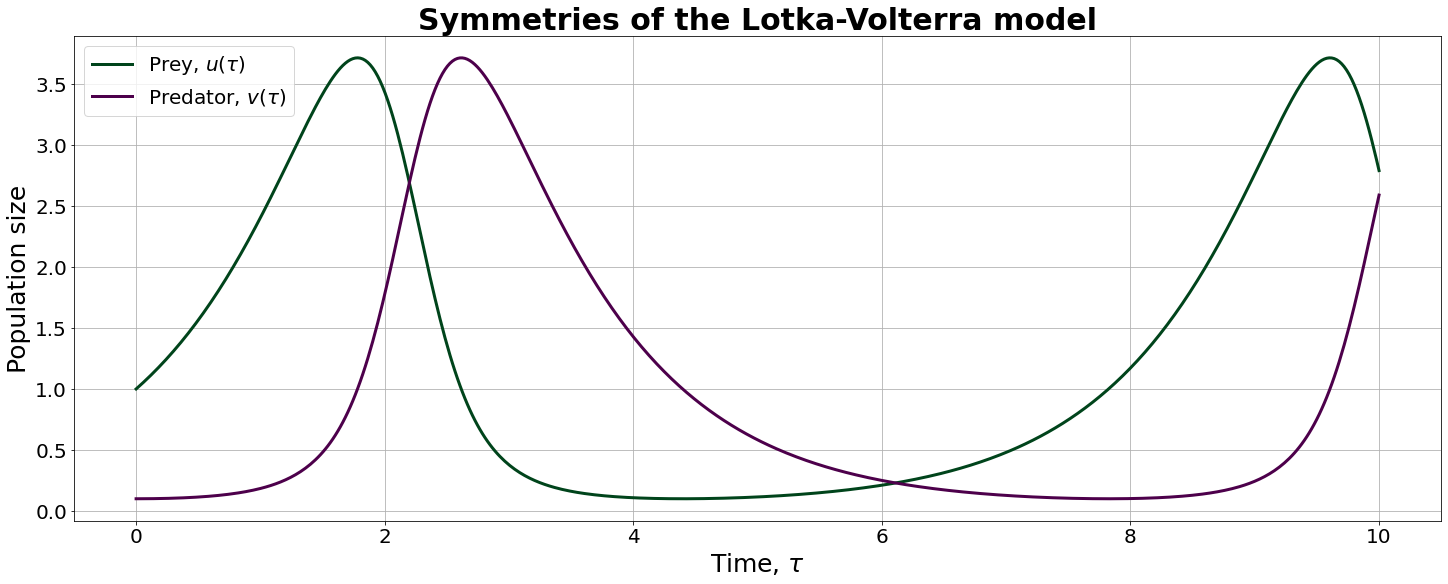

In [2]:
from numpy import * # For numerical calculations,
import matplotlib.pyplot as plt # For plotting,
from scipy import integrate # For solving ODEs.
# Function 1: ODE for the LV model
def dX_dt_LV(X, t=0,a=1):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ X[0]*(1-X[1]) ,
                   a*X[1]*(X[0]-1)])
# Define the time vector and the initial conditions
t = linspace(0, 10, 500)              # time
X0 = array([1, 0.10])                     # initials conditions: 10 rabbits and 5 foxes
# Solve the ODE at hand
X1, infodict = integrate.odeint(dX_dt_LV, X0, t, args = (1,),full_output=True)
infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u, v = X1.T
# Plot our lovely solutions
fig_1 = plt.figure(constrained_layout=True, figsize=(20, 8))
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
plt.plot(t, v  , '-', label='Predator, $v(\\tau)$',color=(77/256,0/256,75/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetries of the Lotka-Volterra model',fontsize=30,weight='bold')
plt.savefig('../Figures/LV_solutions.png')


### Try to integrate Wolphram alpha's solution

In [14]:
# Import the lambert W function from scipy
from scipy.special import lambertw
# Import quad so we can evaluate our integral as well
from scipy.integrate import quad
#=======================================================================================
# Define the integrand
def integrand_u(s,u_val,v_val,alpha):
    # Define the nominator
    nom = s
    # Define the first factor of the denominator
    factor_1 = -s+(2*s**2)-(s**3)
    # Define the argument of the Lambertz function
    I = -exp(-v_val-alpha*u_val+alpha*s)*(u_val**alpha)*v_val*(s**(-alpha))
    if lambertw(I,0).imag ==0:
        # The remaining term involving the Lambertz W function
        factor_2 = 1+lambertw(I,0).real
    elif lambertw(I,1).imag ==0:
        factor_2 = 1+lambertw(I,1).real
    # Now we can define the denominator
    denom = factor_1*factor_2
    # Now, we can return the integral
    return nom/denom
#=======================================================================================
# Define a point which we find the tangent for
temp_index = 200
# Set the value of alpha to 1
alpha = 1
# Solve the integral
print(quad(integrand_u, 1, u[temp_index], args=(u[temp_index],v[temp_index],alpha)))
xi_u = quad(integrand_u, 1, u[temp_index], args=(u[temp_index],v[temp_index],alpha))[0]
# Add the constant term
xi_u += v[temp_index]+alpha*u[temp_index]-log((u[temp_index]**alpha)*v[temp_index])
# Print our local tangent
print(xi_u)

(-1.0663905487832075, 1.2771500992769802e-05)
2.3361937795939554


/tmp/ipykernel_19830/158353817.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  print(quad(integrand_u, 1, u[temp_index], args=(u[temp_index],v[temp_index],alpha)))
/tmp/ipykernel_19830/158353817.py:30: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_u = quad(integrand_u, 1, u[temp_index], args=(u[temp_index],v[temp_index],alpha))[0]


### Check properties of Sympy's solution

In [36]:
# Extract a value of v
v_temp = v[10]
# Calculate our invariant
I2 = v_temp*exp(-v_temp)
# print our Lambertz branches
print("Lambertz branches")
print(lambertw(I2,0))
print(lambertw(I2,1))
# Print the value of our magical limit
print("Magical limit")
print(exp(1/exp(1)))
# Print logical statement
if I2>0 and I2<exp(1/exp(1)):
    print("Zeroth branch is real!")
elif I2>exp(1/exp(1)) and I2<1:
    print("First branch is real!")    

Lambertz branches
(0.08459215601005178+0j)
(-4.121127622623853+3.899345914755518j)
Magical limit
1.444667861009766
Zeroth branch is real!


### Plot the u-directional symmetry of the LV-model using SymPy's solution

First point
[0.2004008  1.1974971  0.10193878]
Second point
[0.58194636 1.81131843 0.10193878]


Text(0.5, 1.0, 'Symmetry $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$')

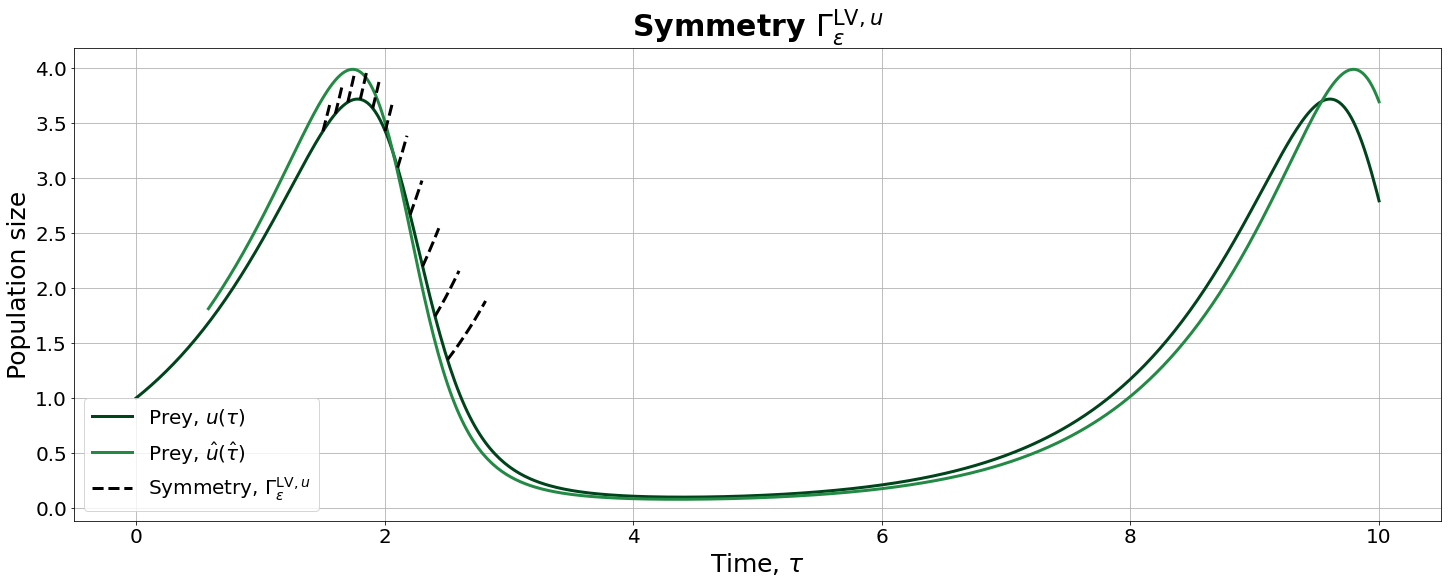

In [60]:

#===========================================================================================
# Function 2: For our tricky integrand
def integrand_u(s,u_val,v_val,alpha):
    # Define the nominator
    nom = s
    # Define the first factor of the denominator
    factor_1 = -s+(2*s**2)-(s**3)
    # Define the argument of the Lambertz function
    I = -exp(-v_val-alpha*u_val+alpha*s)*(u_val**alpha)*v_val*(s**(-alpha))
    # We use the real branch of the Lambertz function
    if lambertw(I,0).imag ==0:
        factor_2 = 1+lambertw(I,0).real
    elif lambertw(I,1).imag ==0:
        factor_2 = 1+lambertw(I,1).real
    # Now, we can define the denominator
    denom = factor_1*factor_2
    # Lastly, we can return the integrand as a fraction
    return nom/denom
# Function 3: ODE for the u-directional symmetry of the LV model
def dX_deps_LV_u_wolphram_alpha(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    # Solve the integral for the time tangent
    xi_u = quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha))[0]
    #xi_u = trapz(integrand_u, 1, X[1], args=(X[1],X[2],alpha))[0]
    # Add the constant term
    xi_u += X[2]+alpha*X[1]-log((X[1]**alpha)*X[2])    
    # Return the dynamics of the linear system
    return array([xi_u,
                  (1/alpha)*(X[1]/(X[1]-1)),
                 0])
# Function 4: ODE for the u-directional symmetry of the LV model based on SymPy
def dX_deps_LV_u(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    # The internal energy
    #H = -((X[1]**alpha)*X[2])*exp(-(alpha*X[1]+X[2]))
    H = -((X[1]**alpha)*X[2])*exp(-(alpha*X[1]+X[2]))
    # Calculate our second invariant
    #I2 = -X[2]*exp(-X[2])
    I2 = X[2]*exp(-X[2])
    # Calculate the ODE term depending on whether the principal branch is real
    # or not
    if I2>0 and I2<exp(1/exp(1)):
        # The remaining term involving the Lambertz W function
        term_2 = ((1)/(X[1]*(lambertw(I2,0).real+1)-lambertw(I2,0).real-1))
    elif I2>exp(1/exp(1)) and I2<1:
        term_2 = ((1)/(X[1]*(lambertw(I2,1).real+1)-lambertw(I2,1).real-1))
    # Return the dynamics of the linear system
    return array([0*H+term_2,
                  (1/alpha)*(X[1]/(X[1]-1)),
                 0])
#===========================================================================================
# Set the value of alpha
alpha = 1
# Epsilon value
epsilon = 0.20
# The transformation parameter
epsilon_vec = linspace(0,epsilon,200)              # epsilon
# We know that Lambertz w satisfies the following (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html):
# The principal branch (k=0) is real if z>-1/e,
# The branch (k>1) is real if -1/e < z < 0.
# Let's make an experiment.
# Magical index
magical_index = 10
# Take a point
X0 = array([t[magical_index], u[magical_index], v[magical_index]])
# Try to solve the ODE at hand
Gamma_epsilon, infodict = integrate.odeint(dX_deps_LV_u, X0, epsilon_vec, args = (alpha,),full_output=True)
# Split the solution into its component parts
Gamma_u_t, Gamma_u_u, Gamma_u_v = Gamma_epsilon.T
# Define a new time vector 
t_2 = linspace(Gamma_u_t[-1], 10, 500)
# Define new initial conditions for the transformed solutions
X02 = array([Gamma_u_t[-1], Gamma_u_u[-1], Gamma_u_v[-1]])  
X0_2 = array([Gamma_u_u[-1], Gamma_u_v[-1]])  
print("First point")
print(X0)
print("Second point")
print(X02)
# Solve the ODE at hand with the new initial conditions
X2, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2, args = (1,),full_output=True)
#infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u_2, v_2 = X2.T
# Plot the symmetry again for some other point on the solution curves
magical_indices = [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]
# Allocate memory for our lovely symmetry
Gamma_u_t_vec = []
Gamma_u_u_vec = []
# Loop over the indices and plot the symmetry transformation
for new_magical_index in magical_indices:
    # Take a point
    X0 = array([t[new_magical_index], u[new_magical_index], v[new_magical_index]])  
    # Try to solve the ODE at hand
    Gamma_epsilon_temp, infodict = integrate.odeint(dX_deps_LV_u, X0, epsilon_vec, args = (alpha,),full_output=True)    
    # Split the solution into its component parts
    Gamma_u_t_temp, Gamma_u_u_temp, Gamma_u_v_temp = Gamma_epsilon_temp.T    
    # Append our solutions
    Gamma_u_t_vec.append(Gamma_u_t_temp)    
    Gamma_u_u_vec.append(Gamma_u_u_temp)    
#=====================================================================================================
# Se if we can plot our symmetry?
fig_2 = plt.figure(constrained_layout=True, figsize=(20, 8))
# The original solution
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
# The transformed solution
plt.plot(t_2, u_2, '-', label="Prey, $\\hat{u}(\\hat{\\tau})$" ,color=(35/256,139/256,69/256),linewidth=3.0)
# The symmetry with legend
#plt.plot(Gamma_u_t,Gamma_u_u, '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
# The symmetry wtihout legend
for index in range(len(Gamma_u_t_vec)):
    if index == 0:
        plt.plot(Gamma_u_t_vec[index],Gamma_u_u_vec[index], '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        plt.plot(Gamma_u_t_vec[index],Gamma_u_u_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},u}$',fontsize=30,weight='bold')


